In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import re

import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider

In [2]:
# Read file in and map to binary classification problem

df = pd.read_csv(r"/home/david/Documents/Cyber-AI/data/dataset_phishing.csv")

In [3]:
# Split into X, y data. Get the column names

names = df.columns.values
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [4]:
# Interactive slider for displaying the mean and standard deviation of each input feature
# Code sourced from Lab 1. It's really nice code

@interact_manual( feature=IntSlider(min=0, max=80, step=1),
label=IntSlider(min=0,max=1,step=1))
def density_plot(feature, label):
 plt.hist(x[y==label,feature], density=True)
 #
 mu = np.mean(x[y==label,feature]) # mean
 var = np.var(x[y==label,feature]) # variance
 std = np.sqrt(var) # standard deviation
 #
 x_axis = np.linspace(mu - 3*std, mu + 3*std, 1000)
 plt.plot(x_axis, norm.pdf(x_axis,mu,std), 'r', lw=2)
 plt.title("Quality "+str(label) )
 plt.xlabel(names[feature], fontsize=14, color='red')
 plt.ylabel('Density', fontsize=14, color='red')
 plt.show()

interactive(children=(IntSlider(value=0, description='feature', max=80), IntSlider(value=0, description='label…

In [5]:
# Interactive slider to show the label density for each of the given inputs
# Once again sourced from lab 1. Probably going to put these in all my notebooks now :3

def fit_generative_model(x,y,feature):
    k = 2 # number of classes
    mu = np.zeros(k) # list of means
    var = np.zeros(k) # list of variances
    pi = np.zeros(k) # list of class weights
    for label in [0,1]:
        indices = (y==label)
        mu[label] = np.mean(x[indices,feature])
        var[label] = np.var(x[indices,feature])
        pi[label] = float(sum(indices))/float(len(y))
    return mu, var, pi

@interact_manual( feature=IntSlider(0,0,80) )
def show_densities(feature):
    mu, var, pi = fit_generative_model(x, y, feature)
    colors = ['r', 'g']
    for classIndex in [0,1]:
        m = mu[classIndex]
        s = np.sqrt(var[classIndex])
        x_axis = np.linspace(m - 3*s, m+3*s, 1000)
        plt.plot(x_axis, norm.pdf(x_axis,m,s), colors[classIndex], label="class " +str(classIndex))
    plt.xlabel(names[feature], fontsize=14, color='red')
    plt.ylabel('Density', fontsize=14, color='red')
    plt.legend()
    plt.show() 

interactive(children=(IntSlider(value=0, description='feature', max=80), Button(description='Run Interact', st…

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, ''),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, ''),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, ''),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, ''),
  Text(50, 0, ''),
  Text(51, 0, ''),
  Text(52, 0, ''),
  T

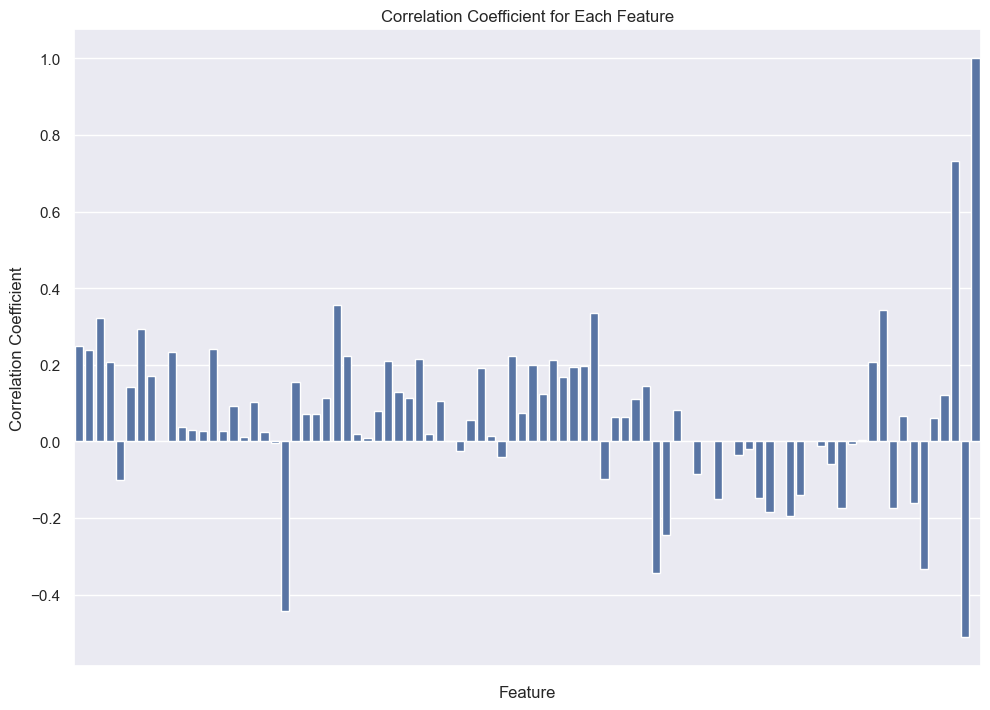

In [8]:
# Investigate correlation of each column to the status (Whether or not it's phishing)
corrs = df.corr()
reses = corrs["status"]
reses

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(reses).set(xticklabels=[], xlabel="Feature", ylabel="Correlation Coefficient", title="Correlation Coefficient for Each Feature")

In [10]:
# Remove any residuals that have a correlation co-efficient of less than 0.2 (Absolute value)

co = reses[abs(reses) > 0.2]
co.info()

<class 'pandas.core.series.Series'>
Index: 24 entries, length_url to status
Series name: status
Non-Null Count  Dtype  
--------------  -----  
24 non-null     float64
dtypes: float64(1)
memory usage: 384.0+ bytes


In [11]:
# Create dataframe from strongly correlated features
correlated = df[co.index]
correlated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   length_url           11430 non-null  int64  
 1   length_hostname      11430 non-null  int64  
 2   ip                   11430 non-null  int64  
 3   nb_dots              11430 non-null  int64  
 4   nb_qm                11430 non-null  int64  
 5   nb_eq                11430 non-null  int64  
 6   nb_slash             11430 non-null  int64  
 7   nb_www               11430 non-null  int64  
 8   ratio_digits_url     11430 non-null  float64
 9   ratio_digits_host    11430 non-null  float64
 10  tld_in_subdomain     11430 non-null  int64  
 11  prefix_suffix        11430 non-null  int64  
 12  shortest_word_host   11430 non-null  int64  
 13  longest_words_raw    11430 non-null  int64  
 14  longest_word_path    11430 non-null  int64  
 15  phish_hints          11430 non-null 

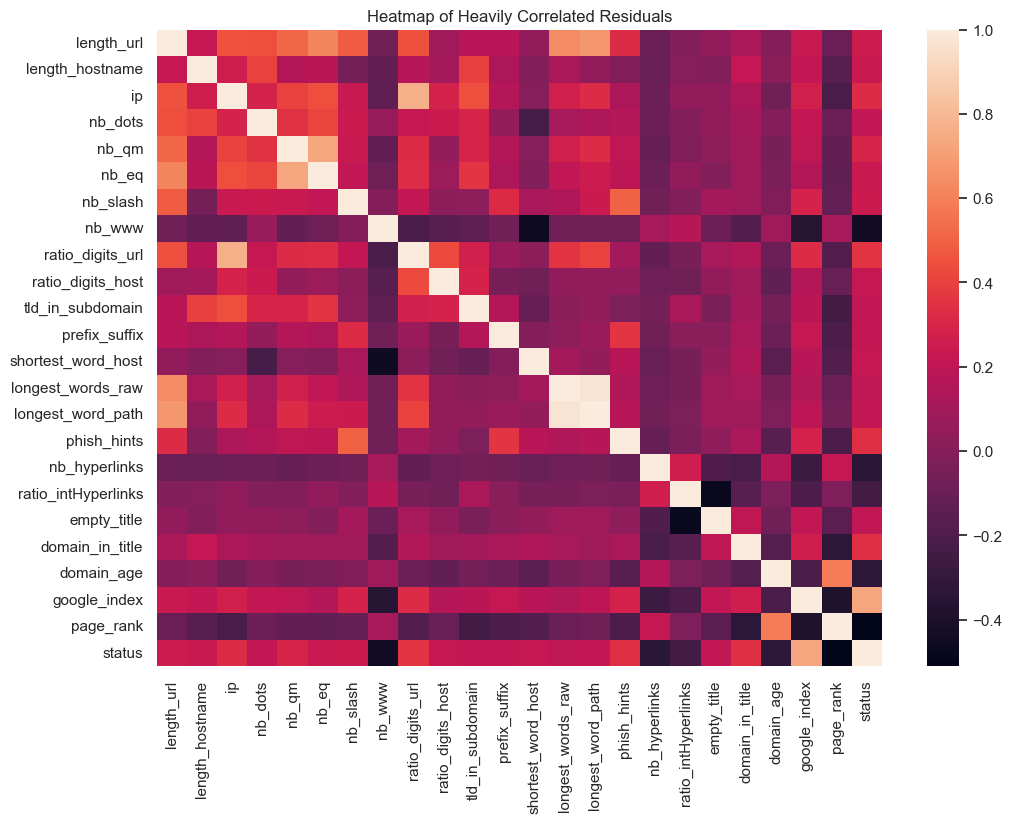

In [13]:
# Create heatmap for viewing, and save reduced dataset to csv
sns.heatmap(correlated.corr()).set(title="Heatmap of Heavily Correlated Residuals")

correlated.to_csv(r"/home/david/Documents/Cyber-AI/data/dataset_phishing_reduced.csv", index=False)

In [17]:
"""
Genetic Algorithm Starts Here
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import time

from random import choices, randint
from statistics import mean
from copy import copy
from math import exp
from joblib import parallel, delayed

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix, ConfusionMatrixDisplay, mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape, r2_score as r2


In [18]:
# Define ML models that can be used for classification, as well as their hyperparameter ranges. These will be automatically tuned using the GA

classification_models = {"knn": {'n_neighbors': range(1, 101), 'weights': ["uniform", "distance"], 'p': [1, 2]},
          'svc': {'penalty': ["l2"], 'loss': ["hinge", "squared_hinge"], 'dual': [True], 'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]},
          'logistic': {'penalty': ["l2"], 'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.], 'dual': [False]},
          'rf': {'n_estimators': [100], 'criterion': ["gini", "entropy"], 'max_features': np.arange(0.05, 1.01, 0.05), 'min_samples_split': range(2, 21), 'min_samples_leaf':  range(1, 21), 'bootstrap': [True, False]},
          'decision_tree': {'criterion': ["gini", "entropy"], 'max_depth': range(1, 11), 'min_samples_split': range(2, 21), 'min_samples_leaf': range(1, 21)}
        }


# Same thing for regression

regression_models = {"rf": {'n_estimators': [100], 'max_features': np.arange(0.05, 1.01, 0.05), 'min_samples_split': range(2, 21), 'min_samples_leaf': range(1, 21), 'bootstrap': [True, False]},
                     "knn": {'n_neighbors': range(1, 101), 'weights': ["uniform", "distance"], 'p': [1, 2]},
                     "decision_tree": {'max_depth': range(1, 11), 'min_samples_split': range(2, 21), 'min_samples_leaf': range(1, 21)},
                     "elastic": {'l1_ratio': np.arange(0.0, 1.01, 0.05), 'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}
                     }


# Define cleaning methods. Implemented scalers, pca and wrapper-based filter selection (Which is handled within the GA class)

cleaners = {"scaler": ["minmax", "robust", "standard", "none"], "pca": ["none", "pca"]}

In [23]:
class GeneticAlgorithm:
    """
    Class for the genetic algorithm
    """

    def __init__(self, model, cols, mode="classification", population=20, generations=20, cv=5, parents=4):
        """
        Function for initialisation of GA
        model -> ML model to be used
        cols -> Number of columns present within the training dataset (For creating the wrapper-based feature selection)
        mode -> Whether to be used for 'classification' or 'regression'
        population -> Number of genomes created in each new iteration
        generations -> Total number of generations
        cv -> k-fold cross-validation
        parents -> Number of successful genomes that will be used to breed the next generation

        returns -> Class instance of genetic algorithm
        """

        self.model = model
        self.cols = cols
        self.mode = mode
        self.population_size = population
        self.generations = generations
        self.cv = cv
        self.parents = parents
        self.population = []
        self.X_train = None
        self.y_train = None
        self.best_genome = None
        self.models = None

        if mode == "classification":
            self.models = classification_models
            self.scoring = "f1"
        else:
            self.models = regression_models
            self.scoring = "r2"

        self.create_population()


    def create_genome(self):
        """
        Creates a genomes

        Genome shape is as follows:

        genome = {Genome: {ML Model hyperparameters}, Cleaners: {Scaler: [scaler], PCA: [PCA]}, Features: [Feature selection wrapper]}

        returns -> Created genome
        """

        genome = {}
        clean = {}

        for key in self.models[self.model]:
            value = choices(self.models[self.model][key], k=1)[0]
            genome[key] = value

        for cleaner in cleaners:
            value = choices(cleaners[cleaner], k=1)[0]
            clean[cleaner] = value

        drop_margins = np.array([randint(0, 1) for _ in range(self.cols)])
        if sum(drop_margins) < 2:
            a = randint(0, len(drop_margins) - 1)
            b = randint(0, len(drop_margins) - 1)
            while b == a:
                b = randint(0, len(drop_margins) - 1)
            drop_margins[a] = 1
            drop_margins[b] = 1
            drop_margins = np.asarray(drop_margins)

        return {"drop_margins": drop_margins, "cleaners": clean, "model": genome}


    def create_model(self, genome):
        """
        Creates the actual machine learning model from the given genome loadout

        genome -> Dictionary loadout of the ML model's hyperparameters

        returns -> Created ML model
        """

        model = None

        # Classification mode
        if self.mode == "classification":
            if self.model == "knn":
                model = KNeighborsClassifier(n_neighbors=genome['n_neighbors'], weights=genome['weights'], p=genome['p'])
            elif self.model == "svc":
                model = LinearSVC(penalty=genome["penalty"], loss=genome["loss"], dual=genome["dual"], tol=genome["tol"], C=genome["C"])
            elif self.model == "logistic":
                model = LogisticRegression(penalty=genome["penalty"], C=genome["C"], dual=genome["dual"])
            elif self.model == "rf":
                model = RandomForestClassifier(n_estimators=genome["n_estimators"], criterion=genome["criterion"], max_features=genome["max_features"], min_samples_split=genome["min_samples_split"], min_samples_leaf=genome["min_samples_leaf"], bootstrap=genome["bootstrap"])
            elif self.model == "decision_tree":
                model = DecisionTreeClassifier(criterion=genome["criterion"], max_depth=genome["max_depth"], min_samples_split=genome["min_samples_split"], min_samples_leaf=genome["min_samples_leaf"])
        # Regression mode
        else:
            if self.model == "rf":
                model = RandomForestRegressor(n_estimators=genome["n_estimators"], max_features=genome["max_features"], min_samples_split=genome["min_samples_split"], min_samples_leaf=genome["min_samples_leaf"], bootstrap=genome["bootstrap"])
            elif self.model == "decision_tree":
                model = DecisionTreeRegressor(max_depth=genome["max_depth"], min_samples_split=genome["min_samples_split"], min_samples_leaf=genome["min_samples_leaf"])
            elif self.model == "elastic":
                model = ElasticNet(l1_ratio=genome["l1_ratio"], tol=genome["tol"])
            elif self.model == "knn":
                model = KNeighborsRegressor(n_neighbors=genome["n_neighbors"], weights=genome["weights"], p=genome["p"])

        return model


    def create_population(self):
        """
        Creates a population of genomes
        """
        for _ in range(self.population_size):
            genome = self.create_genome()
            self.population.append(genome)


    def fit(self, X_train, y_train):
        """
        Main training loop of the GA
        Iteratively trains populations, selects the strongest genomes, breeds, mutates and creates new populations
        Rinse and repeat

        X_train -> Input training data
        y_train -> Input training labels
        """

        self.X_train = X_train  
        self.y_train = y_train

        start = time.time()

        for generation in range(self.generations):

            # Fitness calculations
            sorted_population = self.sort_by_fitness()

            # For all but the last generation, keep creating new populations
            if generation != self.generations - 1:
                parents = self.create_parents(sorted_population)
                crossovers = self.create_crossovers(parents)
                parents.extend(crossovers)
                mutations = self.create_mutations(parents)
                parents.extend(mutations)
                self.population = parents

            # Print out the load on the final generation
            else:
                if generation % 5 == 0:
                    print()
                    print(f"generation {generation}")
                self.best_genome = sorted_population[0]
                end = time.time()
                print("best drop_margins {0}".format(self.best_genome["drop_margins"]))
                print("best cleaners {0}".format(self.best_genome["cleaners"]))
                print("best model {0}".format(self.best_genome["model"]))
                print("Average training time: {0}".format((end-start)/(self.population_size*self.generations)))

            
    def create_parents(self, population):
        """
        Select the strongest parents to feature in the next generation
        Allows some degree of exploration vs exploitation by randomly selecting from the pool
        But places exponentially higher weights on successful models

        population -> input population, with pre-calculated fitness

        returns -> Most suitable parents for next generation
        """
        parents = []

        while len(parents) < self.parents:
            new_parent = choices(population, k=1, weights=[exp(-x*0.1) for x in range(self.population_size)])[0]
            present = 0
            for parent in parents:
                if np.array_equal(new_parent["drop_margins"], parent["drop_margins"]) and new_parent["cleaners"] == parent["cleaners"] and new_parent["model"] == parent["model"]:
                    present = 1
            if not present:
                parents.append(new_parent)

        return parents
    

    def create_crossovers(self, parents):
        """
        Perform genetic crossover mutation for each of the parents
        Essentially creates two offsprings which are the results of both parent's genomes
        Performs over each possible combination of parents

        Parents -> Parent genomes

        returns -> Created offspring
        """

        crossovers = []
        parent_posses = [i for i in range(len(parents))]
        pairs = list(itertools.combinations(parent_posses, 2))

        for pair in pairs:

            parent_a = parents[pair[0]]
            parent_b = parents[pair[1]]

            alternator = 0

            drop_margins_a = []
            drop_margins_b = []

            cleaners_a = {}
            cleaners_b = {}

            model_a = {}
            model_b = {}

            for i in range(len(parent_a["drop_margins"])):
                if alternator:
                    drop_margins_a.append(parent_a["drop_margins"][i])
                    drop_margins_b.append(parent_b["drop_margins"][i])
                else:
                    drop_margins_a.append(parent_b["drop_margins"][i])
                    drop_margins_b.append(parent_a["drop_margins"][i])
                alternator = not alternator

            for cleaner in parent_a["cleaners"]:
                if alternator:
                    cleaners_a[cleaner] = parent_a["cleaners"][cleaner]
                    cleaners_b[cleaner] = parent_b["cleaners"][cleaner]
                else:
                    cleaners_a[cleaner] = parent_b["cleaners"][cleaner]
                    cleaners_b[cleaner] = parent_a["cleaners"][cleaner]
                alternator = not alternator

            for key in parent_a["model"]:
                if alternator:
                    model_a[key] = parent_a["model"][key]
                    model_b[key] = parent_b["model"][key]
                else:
                    model_a[key] = parent_b["model"][key]
                    model_b[key] = parent_a["model"][key]
                alternator = not alternator

            child_a = {"drop_margins": drop_margins_a, "cleaners": cleaners_a, "model": model_a}
            child_b = {"drop_margins": drop_margins_b, "cleaners": cleaners_b, "model": model_b}

            crossovers.append(child_a)
            crossovers.append(child_b)

        return crossovers
    

    def create_mutations(self, population, n_mutations=2):
        """
        Performs mutations on existing members in population
        Randomly changes n_mutations number of values within the genome
        Possible alterations exist within the feature wrapping, cleaners and ML hyperparameters

        population -> Input population of parents and crossover offspring
        n_mutations -> Number of mutations to perform for each new genome 

        returns -> Mutated offspring
        """

        mutations = []

        while len(population) + len(mutations) < self.population_size:
            genome = population[randint(0, len(population) - 1)].copy()

            for _ in range(n_mutations):
                segment = randint(0, len(genome)-1)

                if segment == 0:
                    index = randint(0, len(genome["drop_margins"]) - 1)
                    genome["drop_margins"][index] = not genome["drop_margins"][index]

                elif segment == 1:
                    index = randint(0, len(genome["cleaners"]) - 1)
                    key = list(genome["cleaners"].keys())[index]
                    new_value = choices(cleaners[key], k=1)[0]
                    genome["cleaners"][key] = new_value

                elif segment == 2:
                    index = randint(0, len(genome["model"]) - 1)
                    key = list(genome["model"].keys())[index]
                    new_value = choices(self.models[self.model][key], k=1)[0]
                    genome["model"][key] = new_value

                    
            mutations.append(genome)

        return mutations

                    
    def sort_by_fitness(self):
        """
        Calculates the fitness of each genome
        Sorts the models in order of performance

        returns -> Sorted list of population, from most to least successful
        """
        
        fitnesses = {}
        repositioned = []

        for genome_pos in range(self.population_size):
            fitness = self.calc_fitness(self.population[genome_pos])
            fitnesses[str(genome_pos)] = fitness

        print(f"Best fitness: {max(fitnesses.values())}")

        for _ in range(self.population_size):
            max_key = max(fitnesses, key=fitnesses.get)
            repositioned.append(self.population[int(max_key)].copy())
            fitnesses.pop(max_key)
      
        return repositioned


    def calc_fitness(self, genome):
        """
        Function for calculating fitness
        Creates the scalers, PCA and ML model in accordance with the genome
        Performs K-fold cross-validation, and returns the accuracy

        genome -> input loadout to be created

        returns -> Average cross-val score
        """
        
        X_train = np.asarray(self.X_train)
        X_train = X_train[:,np.asarray(genome["drop_margins"]).astype('bool')]
        
        if genome["cleaners"]["scaler"] == "robust":
            scaler = RobustScaler()
            X_train = scaler.fit_transform(X_train)
        elif genome["cleaners"]["scaler"] == "standard":
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
        elif genome["cleaners"]["scaler"] == "minmax":
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)

        if genome["cleaners"]["pca"] == "pca":
            pca = PCA(n_components="mle")
            X_train = pca.fit_transform(X_train)

        model = self.create_model(genome["model"])

        scores = cross_val_score(estimator=model, X=X_train, y=self.y_train, cv=self.cv, scoring=self.scoring)
        return mean(scores)
    

    def predict(self, X_test, y_test):
        """
        Takes the best model and uses it to predict on the testing dataset

        X_test -> Input testing data
        y_test -> Input testing labels
        """

        X_train = np.asarray(self.X_train)
        X_test = np.asarray(X_test)
        X_train = X_train[:,np.asarray(self.best_genome["drop_margins"]).astype('bool')]
        X_test = X_test[:,np.asarray(self.best_genome["drop_margins"]).astype('bool')]
        
        # Create cleaners
        if self.best_genome["cleaners"]["scaler"] == "robust":
            scaler = RobustScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)
        elif self.best_genome["cleaners"]["scaler"] == "standard":
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)
        elif self.best_genome["cleaners"]["scaler"] == "minmax":
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.fit_transform(X_test)

        if self.best_genome["cleaners"]["pca"] == "pca":
            pca = PCA(n_components="mle")
            X_train = pca.fit_transform(X_train)
            X_test = pca.fit_transform(X_test)

        # Create model
        model = self.create_model(self.best_genome["model"])

        # Fit training data, train and predict on testing data
        model.fit(X_train, self.y_train)

        start = time.time()
        predictions = model.predict(X_test)
        end = time.time()

        # Print out scores
        if self.mode == "classification":

            accuracy = accuracy_score(y_test, predictions)
            f1 = f1_score(y_test, predictions)
            recall = recall_score(y_test, predictions)
            precision = precision_score(y_test, predictions)

            print()
            print()
            print(f"Final Accuracy: {accuracy}")
            print(f"Final f1: {f1}")
            print(f"Final recall: {recall}")
            print(f"Final precision: {precision}")
            print("Testing time: {0}".format(end-start))

            cm = confusion_matrix(y_test, predictions)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot()
            plt.show()

        elif self.mode == "regression":

            RMSE = mse(y_test, predictions, squared=False)
            MAE = mae(y_test, predictions)
            MAPE = mape(y_test, predictions)
            R2 = r2(y_test, predictions)

            print()
            print()
            print(f"Final RMSE: {RMSE}")
            print(f"Final MAE: {MAE}")
            print(f"Final MAPE: {MAPE}")
            print(f"Final R2: {R2}")
            print("Testing time: {0}".format(end-start))

        


Best fitness: 0.9266643741986975
Best fitness: 0.9324770106908108
Best fitness: 0.9319120221557169
Best fitness: 0.932544729887176
Best fitness: 0.9317962294770501
Best fitness: 0.9307400868235982
Best fitness: 0.9291362560458881
Best fitness: 0.9285473780660025
Best fitness: 0.9290573300882878
Best fitness: 0.9283905818154655
Best fitness: 0.929923862953316
Best fitness: 0.9300327332242226
Best fitness: 0.928184053694366
Best fitness: 0.9288112434654052
Best fitness: 0.9307798874633314
Best fitness: 0.9312343551641389
Best fitness: 0.930621673861345
Best fitness: 0.9300098844868907
Best fitness: 0.9314974346162667
Best fitness: 0.9304951367093384
best drop_margins [1, 0, 1, False, False, False, 1, 1, 0, 0, 0, 0, 1, True, 0, True, 1, 1, 1, 1, 1, 1, 1]
best cleaners {'scaler': 'robust', 'pca': 'none'}
best model {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 1}
Average training time: 0.06830962896347045
predicting


Final Accuracy: 0.9328201539538139
F

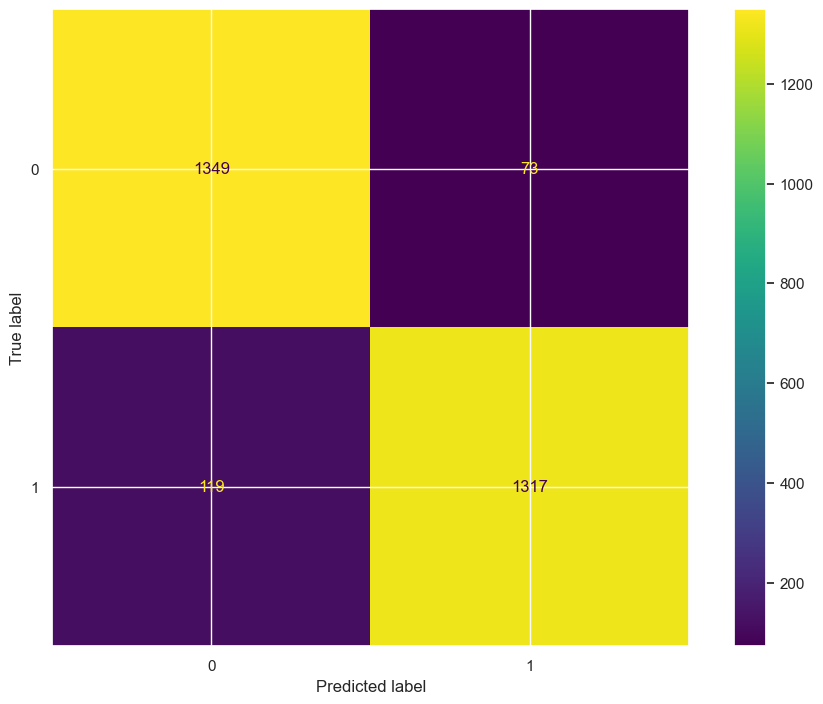

In [24]:
# Function calls to run the GA

data_path = r"/home/david/Documents/Cyber-AI/data/dataset_phishing_reduced.csv"
df = pd.read_csv(data_path)

labels = df["status"]
data = df.drop("status", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

genetic_algorithm = GeneticAlgorithm("decision_tree", cols=X_train.shape[1], mode="classification", parents=3, population=20, generations=20, cv=2)
genetic_algorithm.fit(X_train, y_train)
print("predicting")
genetic_algorithm.predict(X_test, y_test)